In [1]:
#import google.colab 
import pandas as pd
import numpy as np
import seaborn as sns


#IN_COLAB = 'google.colab' in str(get_ipython())
IN_COLAB = False

if IN_COLAB:
    !wget https://raw.githubusercontent.com/AkeemSemper/ML_for_Non_DS_Students/main/data/NBA.csv
    !wget https://raw.githubusercontent.com/AkeemSemper/ML_for_Non_DS_Students/main/data/NFL.csv
    nba = pd.read_csv("NBA.csv")
    nfl = pd.read_csv("NFL.csv")

else:
    nba = pd.read_csv("../data/NBA.csv")
    nfl = pd.read_csv("../data/NFL.csv")

import warnings
warnings.filterwarnings('ignore')

nfl["Height"] = nfl["Height (inches)"].astype(float) * 2.54
nfl["Weight"] = nfl["Weight (lbs)"].astype(float) * 0.453592
nfl.drop(["Height (inches)", "Weight (lbs)"], axis=1, inplace=True)

nfl_hw = nfl[["Height", "Weight"]]
nba_hw = nba[["Height", "Weight"]]
nfl_hw.dropna(inplace=True)
nba_hw.dropna(inplace=True)

# Introduction to Regression 

A regression is the most basic type of predictive model, it predicts some numerical target based on one or more input features. In simple 2D scenario, the line of best fit is the model, or the regression line. 

The model is a simple machine, it takes in inputs, processes them and gives out an output. 

### Simple Linear Regression

The simplest form of regression is the simple linear regression, where we have only one input feature. The model is a line, and the equation of the line is given by:

$$y = mx + b$$

Where $y$ is the target, $x$ is the input feature, $m$ is the slope of the line and $b$ is the y-intercept. We can picture this as a line on a 2D plane by either calculating the slope and y-intercept, or by plotting the points and drawing the line of best fit with a seaborn regplot. 

<Axes: xlabel='Height', ylabel='Weight'>

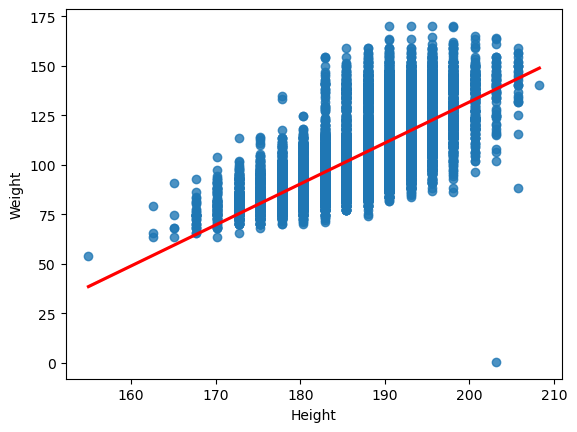

In [2]:
sns.regplot(x="Height", y="Weight", data=nfl_hw, line_kws={"color":"r"})

## Algorithms and Models

Our predictions come from predictive models, which are mathematical equations that take in input features and give out a prediction. These models are 'trained on' the data that we provide, so whatever algorithm we are using will take the data and use it to create some kind of model that can make predictions for Y. 

### Linear Least Squares Regression

We used one predictive modelling algorithm in the previous notebook, the linear least squares regression. This is a simple algorithm that finds the line of best fit for the data.

It is critical to note, the output of this algorithm is a model, and that model can do exactly one thing - take in inputs and produce an output. If we used a 'real' machine learning algorithm we'd get the same thing, a model that can take in inputs and produce an output. The difference is that the calculations that the algorithm uses to create the model are different. 

### Training a Model

We often refer to the process of 'training a model', though as of now it may not seem that significant. The training process is the process of finding the best model for the data, or doing the math to create the model. For linear-least squares, the training process is just the calculations that go on in this little function, as the outcome is a model. In other algorithms, the training process is more complex, and may involve more than just a few calculations.

In [3]:
def linear_least_squares(x, y):
    """
    Calculate the coefficients of the least squares line. This uses array calculations, so it looks a little different. 

    Parameters
    ----------
    x : array-like
        The x-coordinates of the data points.
    y : array-like
        The y-coordinates of the data points.

    Returns
    -------
    tuple
        The slope and intercept of the least squares line.
    """
    # Calculate the means of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calculate the slope and intercept
    slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    intercept = y_mean - slope * x_mean

    return slope, intercept

We can package the results up into a function to make it a bit easier. In real usage, we'll use a library that takes care of some of this for us. 

In [4]:
nfl_slope, nfl_intercept = linear_least_squares(nfl_hw['Height'], nfl_hw['Weight'])

def regressionWeightNFL(x):
    return nfl_slope * x + nfl_intercept

We can now get predictions for any input feature (X) by plugging it into the model.

In [5]:
weight_200cm = regressionWeightNFL(200)
print(f"A player with a height of 200cm is expected to weigh {weight_200cm:.2f}kg")

weight_146cm = regressionWeightNFL(146)
print(f"A player with a height of 146cm is expected to weigh {weight_146cm:.2f}kg")

A player with a height of 200cm is expected to weigh 131.68kg
A player with a height of 146cm is expected to weigh 19.99kg


### Predictions and Evaluation

Once our model is trained, or created, we can use it to make predictions. This means that if we make a model that predicts if people will pay back a loan, we can go and start using it to approve or deny loans. At this point though, we don't have any verification that our model is any good - maybe we are making great decisions, maybe we aren't, we don't know.

## Evaluating Models

The process for measuring the quality of a model is called model evaluation. Some of the details will vary a little bit when we use different algorithms, but the general idea is the same. We will take (some of) the data that we already have for training the model, which has the target that we want to predict in it (i.e. we know the true value of Y), make predictions, then compare those predictions to the true values to get the residuals. 

In [6]:
nfl_weight_preds = nfl_hw['Height'].apply(regressionWeightNFL)

nfl_hw["Weight Predictions"] = nfl_weight_preds
nfl_hw["Residuals"] = nfl_hw["Weight"] - nfl_weight_preds
nfl_hw["Residual Squared"] = nfl_hw["Residuals"]**2
nfl_hw.sample(20)

,Height,Weight,Weight Predictions,Residuals,Residual Squared
5723,177.80,102.058200,85.761510,16.296690,265.582117
12460,185.42,84.821704,101.522939,-16.701235,278.931236
472,190.50,111.130040,112.030558,-0.900518,0.810932
13919,180.34,83.914520,91.015319,-7.100799,50.421350
13727,185.42,82.553744,101.522939,-18.969195,359.830343
5107,193.04,117.933920,117.284368,0.649552,0.421918
2281,185.42,92.986360,101.522939,-8.536579,72.873174
12244,190.50,108.862080,112.030558,-3.168478,10.039252
5761,187.96,131.541680,106.776748,24.764932,613.301846
3383,187.96,125.191392,106.776748,18.414644,339.099105


### Residual to Measure Error

We now have a set of residuals, which are the differences between the true values and the predicted values. We can use these to measure the error of the model. The most common way to do this is to square the residuals, then take the average of the squares. This is called the mean squared error (MSE). 

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Where $y_i$ is the true value, $\hat{y}_i$ is the predicted value, and $n$ is the number of observations.

The MSE is the most common error metric used in regression calculations, and is the default error metric in many algorithms. As humans, we generally take the square root of the MSE to get the root mean squared error (RMSE), which is in the same units as the target so it is easier to interpret. The RMSE that we will calculate below is roughly the average error of each prediction made, or how close we expect to be to the true value on average. 

In [7]:
nfl_mse = np.mean(nfl_hw["Residuals"]**2)
nfl_rmse = np.sqrt(nfl_mse)

print(f"The MSE of the NFL model is {nfl_mse:.2f}")
print(f"The RMSE of the NFL model is {nfl_rmse:.2f}")


The MSE of the NFL model is 178.35
The RMSE of the NFL model is 13.35


## Exercise - Regression and RMSE

For the NBA data, does the height or the BMI act as a better predictor for the weight of the players?

In [ ]:
# Solve it

## R-Squared

In addition to the RMSE, we can also calculate the R-squared value. This is a measure of how much of the variance in the target is explained by the model. It is a number between 0 and 1, where 1 means that the model explains all of the variance in the target, and 0 means that the model explains none of the variance in the target.

![R2](../images/r2.png "R2")

R-squared is a measure of how well the model fits the data, or the strength of the relationship between the input X values and the target Y values. It is a measure of the strength of the relationship between the model and the target. In a linear regression we can best see examples of this by looking at the scatter plot of the data and the line of best fit. When we deal with data in higher dimensions (i.e. more than one input feature), we can't really visualize the data in the same way, but the R-squared value gives us a good idea of how well the model fits the data.

The R-squared value is calculated as:

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

Where $y_i$ is the true value, $\hat{y}_i$ is the predicted value, and $\bar{y}$ is the mean of the true values.

We can compare models to each other, in almost any scenario, by comparing their R-squared values. These are not dependent on the scale of the target, so we can compare models that predict different things.

In [10]:
nfl_hw_r2 = 1 - (np.sum(nfl_hw["Residual Squared"]) / np.sum((nfl_hw["Weight"] - np.mean(nfl_hw["Weight"]))**2))
print(f"The R^2 of the NFL model is {nfl_hw_r2:.2f}")

The R^2 of the NFL model is 0.51


We can also compare this to the correlation. These values should be the same, but I'd suspect some small differences from lots of rounding. 

In [11]:
nfl_hw_corr = nfl_hw[["Height", "Weight"]].corr()
print(f"The correlation between height and weight in the NFL is {nfl_hw_corr.iloc[0,1]:.2f}")
print(f"The correlation squared is {nfl_hw_corr.iloc[0,1]**2:.2f}")

The correlation between height and weight in the NFL is 0.71
The correlation squared is 0.51


### Error Metrics with Libraries

We can calculate the RMSE and R-squared values with the scikit-learn library rather than having to free-wheel it. The sklearn library contains may different tools and functions for machine learning and we'll use it to make other types of models soon. These functions are well documented in the sklearn documentation, and are easy to use. This is a good chance to reference the documentation and see how to use it, try to Google "sklearn RMSE" or "sklearn R-squared" and go to the documentation page. There is generally also a link to a user guide that explains how to use the functions. 

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the predictions
nfl_hw_preds = regressionWeightNFL(nfl_hw['Height'])

# Calculate the MSE
nfl_hw_mse = mean_squared_error(nfl_hw['Weight'], nfl_hw_preds)

# Calculate the RMSE
nfl_hw_rmse = np.sqrt(nfl_hw_mse)

# Calculate the R2 score
nfl_hw_r2 = r2_score(nfl_hw['Weight'], nfl_hw_preds)

print(f"The MSE of the NFL model is {nfl_hw_mse:.2f}")
print(f"The RMSE of the NFL model is {nfl_hw_rmse:.2f}")
print(f"The R2 score of the NFL model is {nfl_hw_r2:.2f}")


The MSE of the NFL model is 178.35
The RMSE of the NFL model is 13.35
The R2 score of the NFL model is 0.51


## Exercise

Use the NBA dataset, create a function for the models that predicts weight from height or BMI, calculate the R2 for each. 

In [13]:
# Solve me

## Example - Using Sklearn

Next workbook we'll look at doing regressions as we normally would, with the sklearn library. This is a little preview of how we'll do it, if this is very confusing, don't worry, we'll go through it in more detail next time. The big difference here is that we can input more than one feature for the X values, so we can use all the data we have to make predictions, instead of just one feature.

In [15]:
from sklearn.linear_model import LinearRegression

# Create the model
nfl_model = LinearRegression()

# Fit (train) the model
nfl_model.fit(nfl_hw[['Height']], nfl_hw['Weight'])

#Evaluate the model
nfl_model_mse = mean_squared_error(nfl_hw['Weight'], nfl_model.predict(nfl_hw[['Height']]))
nfl_model_rmse = np.sqrt(nfl_model_mse)
nfl_model_r2 = nfl_model.score(nfl_hw[['Height']], nfl_hw['Weight'])

print(f"The MSE of the NFL model is {nfl_model_mse:.2f}")
print(f"The RMSE of the NFL model is {nfl_model_rmse:.2f}")
print(f"The R2 score of the NFL model is {nfl_model_r2:.2f}")

The MSE of the NFL model is 178.35
The RMSE of the NFL model is 13.35
The R2 score of the NFL model is 0.51


We don't need to look at the residuals to calculate the summary metrics, but we can generate them to see how similar they are to the ones we did by hand.

In [16]:
nfl_hw["SK_Residuals"] = nfl_hw["Weight"] - nfl_model.predict(nfl_hw[['Height']])
nfl_hw["SK_Residual Squared"] = nfl_hw["Residuals"]**2
nfl_hw.sample(20)

,Height,Weight,Weight Predictions,Residuals,Residual Squared,SK_Residuals,SK_Residual Squared
10036,195.58,129.273720,122.538177,6.735543,45.367537,6.735543,45.367537
6504,187.96,83.914520,106.776748,-22.862228,522.681480,-22.862228,522.681480
15971,180.34,86.636072,91.015319,-4.379247,19.177807,-4.379247,19.177807
7208,180.34,78.017824,91.015319,-12.997495,168.934884,-12.997495,168.934884
1134,180.34,81.646560,91.015319,-9.368759,87.773650,-9.368759,87.773650
934,180.34,104.326160,91.015319,13.310841,177.178481,13.310841,177.178481
9676,185.42,100.697424,101.522939,-0.825515,0.681474,-0.825515,0.681474
5104,187.96,75.296272,106.776748,-31.480476,991.020384,-31.480476,991.020384
1581,177.80,134.716824,85.761510,48.955314,2396.622805,48.955314,2396.622805
6871,193.04,121.562656,117.284368,4.278288,18.303752,4.278288,18.303752


And if we were to use more than one feature...

In [32]:
nfl_muti_data = nfl[["Age", "Weight", "Height", "Number"]]
nfl_muti_data.dropna(inplace=True)
nfl_muti_data.head()

,Age,Weight,Height,Number
4,25.0,138.345560,195.58,96.0
35,29.0,90.718400,180.34,20.0
37,26.0,92.986360,182.88,38.0
45,24.0,133.809640,190.50,63.0
63,27.0,94.347136,187.96,22.0


In [33]:
nfl_multi_model = LinearRegression()


y_data = nfl_muti_data["Weight"]
X_data = nfl_muti_data.drop(columns=["Weight"])

nfl_multi_model.fit(X_data, y_data)

nfl_multi_model_mse = mean_squared_error(y_data, nfl_multi_model.predict(X_data))
nfl_multi_model_rmse = np.sqrt(nfl_multi_model_mse)
nfl_multi_model_r2 = nfl_multi_model.score(X_data, y_data)

print(f"The MSE of the NFL model is {nfl_multi_model_mse:.2f}")
print(f"The RMSE of the NFL model is {nfl_multi_model_rmse:.2f}")
print(f"The R2 score of the NFL model is {nfl_multi_model_r2:.2f}")

The MSE of the NFL model is 144.26
The RMSE of the NFL model is 12.01
The R2 score of the NFL model is 0.67
